In [56]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import keras

In [57]:
os.sys.path

['',
 'C:\\Users\\admin\\Anaconda3\\python36.zip',
 'C:\\Users\\admin\\Anaconda3\\DLLs',
 'C:\\Users\\admin\\Anaconda3\\lib',
 'C:\\Users\\admin\\Anaconda3',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\admin\\.ipython']

In [58]:
seed =128
rng = np.random.RandomState(seed)

In [59]:
os.chdir("C:\\Users\\admin\\Desktop")

In [60]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir,'data')

In [61]:
train = pd.read_csv(os.path.join(data_dir,'train.csv'))
print(train)

        filename  label
0          0.png      4
1          1.png      9
2          2.png      1
3          3.png      7
4          4.png      3
5          5.png      9
6          6.png      4
7          7.png      9
8          8.png      3
9          9.png      4
10        10.png      2
11        11.png      3
12        12.png      6
13        13.png      6
14        14.png      0
15        15.png      4
16        16.png      8
17        17.png      7
18        18.png      9
19        19.png      5
20        20.png      3
21        21.png      9
22        22.png      1
23        23.png      9
24        24.png      6
25        25.png      8
26        26.png      9
27        27.png      5
28        28.png      7
29        29.png      3
...          ...    ...
48970  48970.png      7
48971  48971.png      5
48972  48972.png      0
48973  48973.png      1
48974  48974.png      4
48975  48975.png      1
48976  48976.png      7
48977  48977.png      5
48978  48978.png      6
48979  48979.png

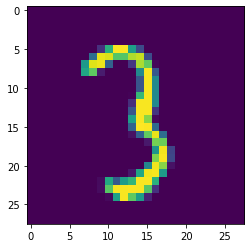

In [62]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'Images','Train',img_name)
img = cv2.imread(filepath,0)
plt.imshow(img)
plt.show()

In [63]:
#print(img)

In [64]:
np.shape(img)

(28, 28)

In [65]:
np.ndim(img)

2

In [66]:
temp = []
for image in train.filename:
    filepath = os.path.join(data_dir,'Images','Train',image)
    img = cv2.imread(filepath,0)
    temp.append(img)

X_train = np.array(temp).reshape(49000,28,28,1)
y_train = list(train['label'])

# DATA AUGMENTATION

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = [0.1,0.2])
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir=os.path.join(data_dir,'Images','Train'), save_prefix='aug', save_format='png'):
    y_train.append(y_batch)

In [67]:
print(len(temp))

49000


In [68]:
train_x = np.stack(temp)

In [69]:
(train_x) = train_x.reshape(-1,784).astype('float32')

In [70]:
from keras.utils import to_categorical
y_train = to_categorical(train['label'],num_classes = 10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [71]:
split_num = int(len(y_train)*0.7)
train_x,val_x = train_x[:split_num],train_x[split_num:]
train_y,val_y = y_train[:split_num],y_train[split_num:]

# NEURAL NETWORKS WITH 2 LAYERS

In [72]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model = Sequential()
model.add(Dense(50,activation = 'relu',input_dim = 784))
model.add(Dense(10,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(train_x,train_y,epochs = 110,batch_size = 128)

Epoch 1/110
34300/34300 [==============================] - 3s 102us/step - loss: 6.0846 - acc: 0.6119 3s - loss: 7.703
Epoch 2/110
34300/34300 [==============================] - 2s 45us/step - loss: 2.8859 - acc: 0.8128
Epoch 3/110
34300/34300 [==============================] - 2s 44us/step - loss: 2.6143 - acc: 0.8316
Epoch 4/110
34300/34300 [==============================] - 2s 44us/step - loss: 2.4944 - acc: 0.8404
Epoch 5/110
34300/34300 [==============================] - 2s 44us/step - loss: 2.3851 - acc: 0.8480
Epoch 6/110
34300/34300 [==============================] - 2s 45us/step - loss: 2.4154 - acc: 0.8458
Epoch 7/110
34300/34300 [==============================] - 2s 49us/step - loss: 2.3671 - acc: 0.8494
Epoch 8/110
34300/34300 [==============================] - 2s 56us/step - loss: 2.3298 - acc: 0.8519
Epoch 9/110
34300/34300 [==============================] - 2s 48us/step - loss: 2.2468 - acc: 0.8569
Epoch 10/110
34300/34300 [==============================] - 1s 43us/step 

34300/34300 [==============================] - 1s 43us/step - loss: 0.4941 - acc: 0.9685
Epoch 81/110
34300/34300 [==============================] - 2s 44us/step - loss: 0.5275 - acc: 0.9661
Epoch 82/110
34300/34300 [==============================] - 1s 43us/step - loss: 0.4699 - acc: 0.9701
Epoch 83/110
34300/34300 [==============================] - 1s 43us/step - loss: 0.5281 - acc: 0.9664
Epoch 84/110
34300/34300 [==============================] - 1s 42us/step - loss: 0.5059 - acc: 0.9677
Epoch 85/110
34300/34300 [==============================] - 1s 43us/step - loss: 0.4867 - acc: 0.9687
Epoch 86/110
34300/34300 [==============================] - 1s 43us/step - loss: 0.5351 - acc: 0.9657
Epoch 87/110
34300/34300 [==============================] - 2s 44us/step - loss: 0.5208 - acc: 0.9670
Epoch 88/110
34300/34300 [==============================] - 2s 45us/step - loss: 0.4767 - acc: 0.9697
Epoch 89/110
34300/34300 [==============================] - 1s 43us/step - loss: 0.4800 - acc: 

In [73]:
score = model.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 1s 76us/step
[0.7225027187178735, 0.9540136054259579]


# NEURAL NETWORKS WITH 4 LAYERS

In [75]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 784))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(10,activation = 'softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model1.fit(train_x,train_y,epochs = 100,batch_size = 128,validation_data = (val_x,val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 4s 127us/step - loss: 6.5954 - acc: 0.5717 - val_loss: 5.7497 - val_acc: 0.6286
Epoch 2/100
34300/34300 [==============================] - 2s 60us/step - loss: 5.4576 - acc: 0.6507 - val_loss: 5.4211 - val_acc: 0.6548
Epoch 3/100
34300/34300 [==============================] - 2s 60us/step - loss: 5.3378 - acc: 0.6600 - val_loss: 5.5316 - val_acc: 0.6467
Epoch 4/100
34300/34300 [==============================] - 2s 62us/step - loss: 5.2302 - acc: 0.6680 - val_loss: 5.2888 - val_acc: 0.6650
Epoch 5/100
34300/34300 [==============================] - 2s 58us/step - loss: 5.2003 - acc: 0.6703 - val_loss: 5.3208 - val_acc: 0.6612
Epoch 6/100
34300/34300 [==============================] - 2s 57us/step - loss: 5.1687 - acc: 0.6732 - val_loss: 5.2766 - val_acc: 0.6673
Epoch 7/100
34300/34300 [==============================] - 2s 62us/step - loss: 5.1308 - acc: 0.6761 - val_loss: 5.2943 -

34300/34300 [==============================] - 2s 58us/step - loss: 0.0552 - acc: 0.9885 - val_loss: 0.2854 - val_acc: 0.9559
Epoch 60/100
34300/34300 [==============================] - 2s 58us/step - loss: 0.0505 - acc: 0.9894 - val_loss: 0.2932 - val_acc: 0.9567
Epoch 61/100
34300/34300 [==============================] - 2s 59us/step - loss: 0.0505 - acc: 0.9891 - val_loss: 0.3008 - val_acc: 0.9548
Epoch 62/100
34300/34300 [==============================] - 2s 58us/step - loss: 0.0479 - acc: 0.9898 - val_loss: 0.3118 - val_acc: 0.9540
Epoch 63/100
34300/34300 [==============================] - 2s 58us/step - loss: 0.0554 - acc: 0.9887 - val_loss: 0.3112 - val_acc: 0.9559
Epoch 64/100
34300/34300 [==============================] - 2s 57us/step - loss: 0.0567 - acc: 0.9879 - val_loss: 0.2803 - val_acc: 0.9578
Epoch 65/100
34300/34300 [==============================] - 2s 61us/step - loss: 0.0496 - acc: 0.9895 - val_loss: 0.2865 - val_acc: 0.9580
Epoch 66/100
34300/34300 [==============

In [76]:
score = model1.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 0s 27us/step
[0.313116614571234, 0.9604081634274957]


# NEURAL NETWORKS WITH DROPOUT REGULARIZATION

In [77]:
from keras.layers import Dropout
model2 = Sequential()
model2.add(Dense(50,activation = 'relu',input_dim = 784))
model2.add(Dropout(0.2))
model2.add(Dense(50,activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50,activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation = 'softmax'))
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model2.fit(train_x,train_y,epochs = 110,batch_size = 128,validation_data = (val_x,val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/110
34300/34300 [==============================] - 5s 141us/step - loss: 9.2449 - acc: 0.3979 - val_loss: 4.1312 - val_acc: 0.7174
Epoch 2/110
34300/34300 [==============================] - 2s 71us/step - loss: 4.5822 - acc: 0.6588 - val_loss: 1.4457 - val_acc: 0.7722
Epoch 3/110
34300/34300 [==============================] - 2s 70us/step - loss: 1.4214 - acc: 0.6423 - val_loss: 0.9128 - val_acc: 0.7522
Epoch 4/110
34300/34300 [==============================] - 2s 73us/step - loss: 1.0263 - acc: 0.7188 - val_loss: 0.7222 - val_acc: 0.8264
Epoch 5/110
34300/34300 [==============================] - 2s 73us/step - loss: 0.8543 - acc: 0.7730 - val_loss: 0.6459 - val_acc: 0.8548
Epoch 6/110
34300/34300 [==============================] - 3s 75us/step - loss: 0.7527 - acc: 0.7988 - val_loss: 0.5527 - val_acc: 0.8714
Epoch 7/110
34300/34300 [==============================] - 2s 69us/step - loss: 0.6763 - acc: 0.8201 - val_loss: 0.4815 -

34300/34300 [==============================] - 2s 72us/step - loss: 0.2068 - acc: 0.9431 - val_loss: 0.2257 - val_acc: 0.9471
Epoch 60/110
34300/34300 [==============================] - 2s 69us/step - loss: 0.2056 - acc: 0.9417 - val_loss: 0.2155 - val_acc: 0.9473
Epoch 61/110
34300/34300 [==============================] - 2s 70us/step - loss: 0.1985 - acc: 0.9444 - val_loss: 0.2210 - val_acc: 0.9471
Epoch 62/110
34300/34300 [==============================] - 2s 71us/step - loss: 0.1984 - acc: 0.9440 - val_loss: 0.2217 - val_acc: 0.9462
Epoch 63/110
34300/34300 [==============================] - 2s 71us/step - loss: 0.1984 - acc: 0.9444 - val_loss: 0.2171 - val_acc: 0.9463
Epoch 64/110
34300/34300 [==============================] - 2s 71us/step - loss: 0.2045 - acc: 0.9433 - val_loss: 0.2093 - val_acc: 0.9492
Epoch 65/110
34300/34300 [==============================] - 3s 73us/step - loss: 0.1933 - acc: 0.9449 - val_loss: 0.2262 - val_acc: 0.9474
Epoch 66/110
34300/34300 [==============

In [78]:
score = model2.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 0s 22us/step
[0.24348815845591681, 0.9481632652899035]


# NEYRAL NETWORKS WITH HE INITIALIZATION

In [79]:
model1 = Sequential()
model1.add(Dense(50,activation = 'relu',input_dim = 784,kernel_initializer = 'he_normal'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(50,activation = 'relu'))
model1.add(Dense(10,activation = 'softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model1.fit(train_x,train_y,epochs = 100,batch_size = 128,validation_data = (val_x,val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 4s 126us/step - loss: 7.5341 - acc: 0.5158 - val_loss: 5.7455 - val_acc: 0.6309
Epoch 2/100
34300/34300 [==============================] - 2s 59us/step - loss: 5.6167 - acc: 0.6406 - val_loss: 5.4962 - val_acc: 0.6514
Epoch 3/100
34300/34300 [==============================] - 2s 55us/step - loss: 5.4371 - acc: 0.6534 - val_loss: 5.5110 - val_acc: 0.6483
Epoch 4/100
34300/34300 [==============================] - 2s 61us/step - loss: 5.3145 - acc: 0.6629 - val_loss: 5.3464 - val_acc: 0.6607
Epoch 5/100
34300/34300 [==============================] - 2s 58us/step - loss: 5.2673 - acc: 0.6668 - val_loss: 5.4098 - val_acc: 0.6551
Epoch 6/100
34300/34300 [==============================] - 2s 59us/step - loss: 5.2007 - acc: 0.6713 - val_loss: 5.2392 - val_acc: 0.6677
Epoch 7/100
34300/34300 [==============================] - 2s 56us/step - loss: 5.1751 - acc: 0.6732 - val_loss: 5.2276 -

34300/34300 [==============================] - 2s 61us/step - loss: 0.0374 - acc: 0.9900 - val_loss: 0.2528 - val_acc: 0.9601
Epoch 60/100
34300/34300 [==============================] - 2s 58us/step - loss: 0.0379 - acc: 0.9900 - val_loss: 0.2733 - val_acc: 0.9592
Epoch 61/100
34300/34300 [==============================] - 2s 61us/step - loss: 0.0218 - acc: 0.9943 - val_loss: 0.2705 - val_acc: 0.9594
Epoch 62/100
34300/34300 [==============================] - 2s 59us/step - loss: 0.0191 - acc: 0.9951 - val_loss: 0.2876 - val_acc: 0.9597
Epoch 63/100
34300/34300 [==============================] - 2s 62us/step - loss: 0.0370 - acc: 0.9911 - val_loss: 0.3191 - val_acc: 0.9566
Epoch 64/100
34300/34300 [==============================] - 2s 58us/step - loss: 0.0389 - acc: 0.9897 - val_loss: 0.2981 - val_acc: 0.9567
Epoch 65/100
34300/34300 [==============================] - 2s 60us/step - loss: 0.0425 - acc: 0.9890 - val_loss: 0.2991 - val_acc: 0.9562
Epoch 66/100
34300/34300 [==============

In [80]:
score = model1.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 0s 25us/step
[0.33520537298552844, 0.9577551019435027]


# NEURAL NETWORKS WITH BATCH NORMALIZATION

In [81]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()
model4.add(Dense(50,activation = 'relu',input_dim = 784,kernel_initializer = 'he_normal'))
model4.add(BatchNormalization())
model4.add(Dense(50,activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(50,activation = 'relu'))
model4.add(BatchNormalization())
model4.add(Dense(10,activation = 'softmax'))
model4.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model4.fit(train_x,train_y,epochs = 100,batch_size = 128,validation_data = (val_x,val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/100
34300/34300 [==============================] - 6s 189us/step - loss: 0.5119 - acc: 0.8521 - val_loss: 0.2274 - val_acc: 0.9339
Epoch 2/100
34300/34300 [==============================] - 3s 85us/step - loss: 0.1853 - acc: 0.9457 - val_loss: 0.1718 - val_acc: 0.9484
Epoch 3/100
34300/34300 [==============================] - 3s 82us/step - loss: 0.1349 - acc: 0.9596 - val_loss: 0.1550 - val_acc: 0.9546
Epoch 4/100
34300/34300 [==============================] - 3s 82us/step - loss: 0.1054 - acc: 0.9688 - val_loss: 0.1420 - val_acc: 0.9567
Epoch 5/100
34300/34300 [==============================] - 3s 81us/step - loss: 0.0837 - acc: 0.9741 - val_loss: 0.1324 - val_acc: 0.9599
Epoch 6/100
34300/34300 [==============================] - 3s 82us/step - loss: 0.0689 - acc: 0.9792 - val_loss: 0.1255 - val_acc: 0.9630
Epoch 7/100
34300/34300 [==============================] - 3s 83us/step - loss: 0.0609 - acc: 0.9813 - val_loss: 0.1346 -

34300/34300 [==============================] - 3s 84us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.1703 - val_acc: 0.9684
Epoch 60/100
34300/34300 [==============================] - 3s 85us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.1660 - val_acc: 0.9698
Epoch 61/100
34300/34300 [==============================] - 3s 80us/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.1729 - val_acc: 0.9677
Epoch 62/100
34300/34300 [==============================] - 3s 81us/step - loss: 0.0065 - acc: 0.9977 - val_loss: 0.1696 - val_acc: 0.9677
Epoch 63/100
34300/34300 [==============================] - 3s 81us/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.1618 - val_acc: 0.9708
Epoch 64/100
34300/34300 [==============================] - 3s 81us/step - loss: 0.0063 - acc: 0.9978 - val_loss: 0.1678 - val_acc: 0.9692
Epoch 65/100
34300/34300 [==============================] - 3s 86us/step - loss: 0.0048 - acc: 0.9983 - val_loss: 0.1590 - val_acc: 0.9703
Epoch 66/100
34300/34300 [==============

In [82]:
score = model4.evaluate(val_x,val_y,batch_size = 128)
print(score)

14700/14700 [==============================] - 0s 33us/step
[0.1644015485697052, 0.9724489796729315]
